# Derivation of Bernoulli's Equations


## Learning outcomes

* Learn how Bernoulli's equations are derived.
* Work in curvilinear coordinates
* Learn about some applications of Bernoulli's equations.

## Recap of Vector fields

As we saw in the previous notebook, the velocity of a fluid flow at each point in an Eulerian sense can be represented by a vector field $\vec{{}V}(\vec{{}x},t)$ where the position vector $\vec{{}x}$ denotes the position of each velocity vector relative to the origin, $\vec{{}x}(x,y,z) = x\mathbf{\hat{{}i}}+y\mathbf{\hat{{}j}}+z\mathbf{\hat{{}k}}$ where $\mathbf{\hat{{}i}}$, $\mathbf{\hat{{}j}}$ and $\mathbf{\hat{{}k}}$ are unit basis vectors, and the current time is given by $t$. Any position vector can be described extending from the origin to some point $(x,y,z)$. Similarly $\vec{{}V}({\hat{{}x}},t)= u\mathbf{\hat{{}i}}+v\mathbf{\hat{{}j}}+w\mathbf{\hat{{}k}}$ where $u={u({\hat{{}x}}},t)$, $v={v({\hat{{}x}}},t)$ and $w={w({\hat{{}x}}},t)$ are the velocity magnitudes in each Cartesian direction for the current time, $t$. An example 2D flow field is shown below. Each vector's tail is positioned on the Cartesian grid according to the position vector $\vec{{}x}$ and the velocity vector, which in this case is time invariant, is given by:

\begin{equation}
\vec{{}V}(x,y) = (\sin(y)+\pi) \mathbf{\hat{{}i}} + 1.2\cos(x) \mathbf{\hat{{}j}},
\end{equation}

which results in a flow from left to right with a slight sinuous meander in the $y$ direction.
We can plot this and also include some streamlines.
 
<img src="media/3.2/flow_field.png" width="800" />
<center>A simple 2D vector field created in MATLAB; can you recreate it? </center>


Can you recreate this flow field with MATLAB or Python?

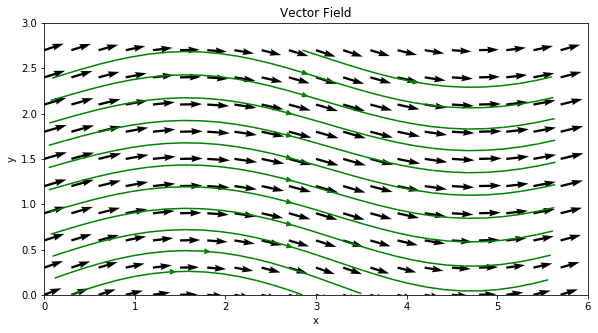

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0, 6, 0.3)
y = np.arange(0, 3, 0.3)

X, Y = np.meshgrid(x, y)

# Velocity components
u = np.sin(Y) + np.pi
v = 1.2*np.cos(X)

# Create a new figure axes
fig, ax = plt.subplots(figsize=(10,5))

# Plot the vector field
ax.quiver(X, Y, u, v)

# Number of streamlines we want to draw
nstream = 12

# Points in (x,y) where the streamlines start (they are then integrated in both directions)
seed_points = np.array([np.linspace(np.median(x), np.median(x),nstream),\
                        np.linspace(np.min(y), np.max(y),nstream)])

ax.streamplot(X, Y, u, v,color='g',start_points=seed_points.T)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Vector Field")
plt.xlim([0, 6])
plt.ylim([0, 3])
ax.set_aspect('equal')
plt.show()

Streamlines, as we have already seen, are simply curves that are everywhere tangent to the flow for any instance in time. This means that the flow is everywhere following the curvature of the streamline and never crosses it. There is no mass flux normal to a streamline. The sinusoidal nature of the flow field shown above is now readily apparent.

If a particle released at some point into the flow and its position $r(\vec{{}x},t)$ was tracked, like the *GPS* coordinates of a buoy following an ocean current, the trajectory it would trace is called a pathline. If the flow is invariant in time, i.e. the flow is steady, then the pathline and the streamline are equivalent.
If on the other hand the flow is time varying (unsteady) the streamlines would move to follow the flow filed everywhere as it changes because they are just another way of viewing the flow field. The position of the particle would update its position with time locally and so its pathline will not follow a streamline for an unsteady flow. 

If our ocean buoy was releasing a coloured dye into the water as if was carried along by the flow the resulting trail is called a streakline. Once again for an unsteady flow the streakline will not necessarily follow the flow field and hence the streamlines, however for a steady, time invariant flow, the strealines and streamlines converge.

Can you think of examples where Engineers can use these concepts?

## Streamline orientated coordinate system

Let us now consider a new coordinate system, $(s,n)$, mapped to the curvature of the streamlines. The position of any particle and its velocity in a steady flow can described in terms of its position along a streamline $s$ and its position normal to that streamline $n$. 
Unlike our simple Cartesian coordinate system this new $(s,n)$ system can be curvilinear but don't worry, it's much the same.

The figure below shows the green streamlines from previous figure as well as the curves normal to them, shown in red. As above the flow is still confined to the streamlines with no velocity normal along the red lines. Notice how as the green streamlines curve upwards the red normal curves fan outwards.

<img src="media/3.2/s_n.png" width="800" />
<center>The s-n coordinate system for the velocity field defined above</center>

Lets try to recreate this image with Python.

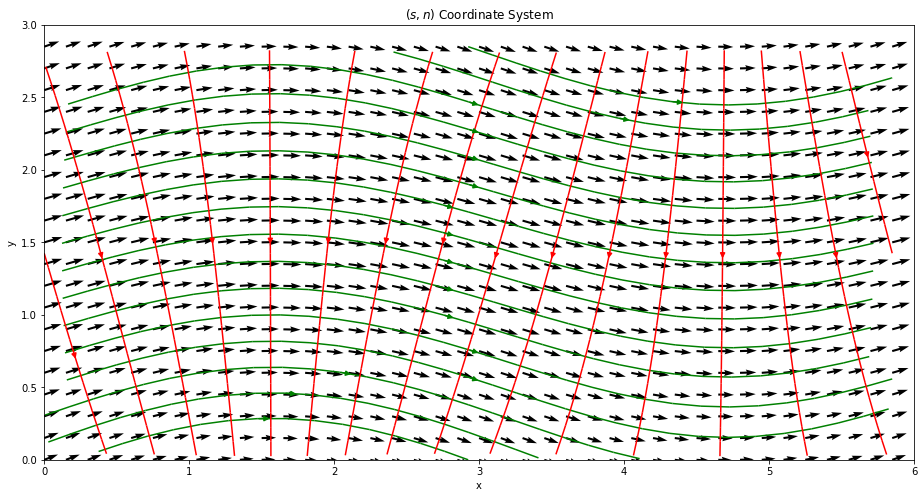

In [5]:
x = np.arange(0, 6, 0.15)
y = np.arange(0, 3, 0.15)

X, Y = np.meshgrid(x, y)

# Velocity components
u = np.sin(Y) + np.pi
v = 1.2*np.cos(X)

# Create a new figure axes
fig, ax = plt.subplots(figsize=(16,8))

# Plot the vector field
ax.quiver(X, Y, u, v)

# We can make this easy by plotting our great streamlines and 
# then plotting red streamlines by flipping the velocity components
# This is a simple inplementation of a rotation matrix

# Becasue we want to define starting points for both sets of streamlines
# we can define a function that we can call upon as needed
# Its good practise to avoid repeating code

def gen_seeds(x,y,nstream):
    seed_points = np.array([np.linspace(np.median(x), np.median(x),nstream),\
                  np.linspace(np.min(y), np.max(y),nstream)])
    return seed_points
    

seed_points = gen_seeds(x,y,16)

ax.streamplot(X, Y, u, v,color='green',start_points=seed_points.T)

# Note that for the flipped streamlines we also need to flip the (x,y) starting points
seed_points = np.flipud(gen_seeds(y,x,16))

ax.streamplot(X, Y, v, -u,color='red',start_points=seed_points.T)

plt.xlabel("x")
plt.ylabel("y")
plt.title("$(s,n)$ Coordinate System")
plt.xlim([0, 6])
plt.ylim([0, 3])
ax.set_aspect('equal')
plt.show()




As with the basis vectors $\mathbf{\hat{{}i}}$ and $\mathbf{\hat{{}j}}$ for the Cartesian system above (and $\mathbf{\hat{{}k}}$ for $\mathbb{R}^3$) we can define basis vectors $\mathbf{\hat{{}s}}$ and $\mathbf{\hat{{}n}}$ for this new coordinate system. A closeup view of the coordinate system is shown below. The local values of the $s$ and $n$ axes are shown as well as the $\mathbf{\hat{{}s}}$ and $\mathbf{\hat{{}n}}$ unit basis vectors for a particle traveling long the $n=0$ streamline between locations $s_1$ and $s_2$. Be careful not to confuse the basis vector $\mathbf{\hat{{}s}}$ with distance $s$.

**To reiterate, the velocity vector $\vec{{}V}$ is always tangent to the streamline.**

<img src="media/3.2/s_n_zoom.png" width="800" />
<center>Detailed view of the s-n coordinate system</center>


In streamline coordinates we can write the velocity vector in terms of these normal and tangent unit vectors:

\begin{align}
\vec{{}V} = V \mathbf{\hat{{}s}} + 0 \mathbf{\hat{{}n}} = V \mathbf{\hat{{}s}},
\end{align}

where $V = V(s,n)$ at position $\mathbf{\hat{{}s}} = {\hat{{}\textrm{s}}}(s,n) $. The velocity of the particle along streamline $s$ is $V$ while the velocity normal along $n$ is zero. For steady flow both flow speed $V$ and direction ${\hat{{}\textrm{s}}}$ are functions of location.

The motion of the fluid particles is governed by Newton's second law, $F=m\vec{{}a}$ and relates the influence of pressure, a force per unit area on fluid motion. The mass of our fluid particle is captured by its density $\rho$, the mass per unit volume. The components of the acceleration vector $\vec{{}a}$ can be written in terms of the $\mathbf{\hat{{}s}}$ and $\mathbf{\hat{{}n}}$ basis vectors using the **material derivative**:

\begin{align}
\vec{{}a} = \frac{D\vec{{}V}}{Dt} = a_s \mathbf{\hat{{}s}} + a_n \mathbf{\hat{{}n}}.
\end{align}

There is an additional Jupyter Notebook covering the Material Derivative in some detail.

The acceleration is then obtained by using the chain rule:

\begin{align}
\vec{{}a} =  \frac{D\left(V \mathbf{\hat{{}s}}\right)}{Dt} = \frac{DV}{Dt}\mathbf{\hat{{}s}} + V \frac{D \mathbf{\hat{{}s}}}{Dt}.
\end{align}

and can be expanded:
\begin{align}
\vec{{}a} = \left( \frac{\partial V}{\partial s} \frac{ds}{dt} + \frac{\partial V}{\partial n} \frac{dn}{dt} \right)\mathbf{\hat{{}s}} + V \left( \frac{\partial \mathbf{\hat{{}s}}}{\partial s} \frac{ds}{dt} + \frac{\partial \mathbf{\hat{{}s}}}{\partial n} \frac{dn}{dt} \right).
\end{align}

Since $\frac{ds}{dt} = V$ and $\frac{dn}{dt} = 0$ becasue the fluid particles always move along the streamline and not normal to it, the previous equation reduces to:

\begin{align}
\vec{{}a} = \left(V \frac{\partial V}{\partial s}  \right)\mathbf{\hat{{}s}} + V \left(V \frac{\partial \mathbf{\hat{{}s}}}{\partial s} \right).
\end{align}

<div class="alert alert-block alert-info">
Therefore:
\begin{align}
a_s = V  \frac{\partial V}{\partial s}.
\end{align}
</div>

Next we need to consider acceleration normal to the streamline, $a_n$. The effects of curvature on the flow will mean that $a_n$ may not be zero even though the velocity normal to the streamline is zero. This should make intuitive sense, you will experience lateral g-forces as you travel in a car going around a bend.

The figure below shows a fluid particle traveling distance $\delta s$ from point $A$ to $B$ along a curved streamline. The basis vectors $\mathbf{\hat{{}s}}$ and $\mathbf{\hat{{}n}}$ are shown positioned at point $A$ and again at point $B$ corresponding to a displacement $\mathbf{\hat{{}s}}(s+\delta s)$ along the streamline. The quantity $ \frac{\partial \mathbf{\hat{{}s}} }{\partial s}$ above represents the limit as $\delta s \rightarrow 0$ of the change in the unit vector orientation along the streamline, $\delta \mathbf{\hat{{}s}}$ per change in the streamline $\delta s$. The basis vector $\mathbf{\hat{{}s}}$ is a unit vector so its magnitude is constant ($|\mathbf{\hat{{}s}}| = 1$) but its orientation along a curved streamline will change.

<img src="media/3.2/vector.png" width="500" />
<center>Analysis of normal acceleration on a curved streamline for a fluid particle moving a distance $\delta s$ from point $A$ to point $B$. Shown also is a velocity triangle showing change in orientation of the unit vector $\mathbf{\hat{{}s}}$ and the resultant vector $\mathbf{\hat{{}s}}(s+\delta s)$ due to the change $\delta\mathbf{\hat{{}s}}$.</center>


We can analyse this motion by considering the velocity triangle shown on the left of the previous figure. The orientation of the velocity vector of the particle as it moves from point $A$ to $B$ changes from $\mathbf{\hat{{}s}}(s)$ to $\mathbf{\hat{{}s}}(s+\delta s)$ therefore the vector $\delta\mathbf{\hat{{}s}}$ represents the change in the orientation of the velocity vector. We can write an expression for $\delta\mathbf{\hat{{}s}}$ as:

\begin{align}
\delta\mathbf{\hat{{}s}} = \mathbf{\hat{{}s}}(s+\delta s) - \mathbf{\hat{{}s}} = \mathbf{\hat{{}s}} + \frac{\partial\mathbf{\hat{{}s}}}{\partial s}\delta s - \mathbf{\hat{{}s}} = \frac{\partial\mathbf{\hat{{}s}}}{\partial s}\delta s.
\end{align}

Both triangles $AOB$ and $A'OB'$ shown in the last figure are similar triangles.
 As $\delta s \rightarrow 0 \Rightarrow \delta\theta \rightarrow 0$, and  $\delta\mathbf{\hat{{}s}}$ becomes increasingly normal to the streamline, i.e. along $n$. Small angle theory gives 
 
 $\sin{\delta\theta} = \delta\theta$, 
 
 therefore $\delta\mathbf{\hat{{}s}} = |\mathbf{\hat{{s}}}|\sin\delta\theta \mathbf{\hat{{n}}} = |\mathbf{\hat{{s}}}|\delta\theta \mathbf{\hat{{n}}} = \delta\theta \mathbf{\hat{{}n}}$ since $|\hat{{}s}|=1$. 
 
Therefore:
 
\begin{align}
\frac{\partial \mathbf{\hat{{}s}}}{\partial s} = \lim_{\delta s \rightarrow 0} \frac{\delta \mathbf{\hat{{}s}}}{\delta s} = \frac{\delta\theta}{\delta s}\mathbf{\hat{{}n}}.
\label{ds}
\end{align}

As $\delta s = \mathbf{R}_c \delta\theta$, equation \ref{ds} becomes 

\begin{align}
\frac{\partial \mathbf{\hat{{}s}}}{\partial s}  = \frac{\mathbf{\hat{{}n}}}{\mathbf{R}_c}
\end{align}

the acceleration can now be written:

\begin{align}
\vec{a} = V\frac{\partial V}{\partial s}\mathbf{\hat{{}s}} + \frac{V^2}{{\mathbf{R}}_c}\mathbf{\hat{{}n}},
\end{align}

or in terms of streamwise and normal components:


<div class="alert alert-block alert-info">
\begin{align}
a_s = V\frac{\partial V}{\partial s},~a_n = \frac{V^2}{{\mathbf{R}}_c}
\end{align}
</div>

## Bernoulli's Equation

Thus far we have considered the motion of a fluid particle along a streamline and derived expressions for the acceleration of the particle along and normal to the flow direction. As previously noted Newton's second law, $F=m\vec{a}$, governs fluid motion. Having already considered acceleration we now turn our attention to the forces acting on the fluid element. These comprise the pressure forces and the gravitational forces and are illustrated below for a fluid particle of volume $\delta { \rlap{V}-} = \delta s\delta n \delta y$ and mass $\delta m$.

<img src="media/3.2/Bernoulli.png" width="800" />
<center>Analysis of forces acting on fluid particle. The terms $p$ and ${ \rlap{V}-}$ are the pressure of the particle and its volume. The top row shows the volume of the fluid particle, the areas where the streamwise and normal pressures are exerted and the decomposition of the gravitational forces into streamwise and normal components.</center>


The sum of the forces in the streamwise direction is

\begin{equation}
\sum \delta F_s = \delta m a_s = \delta mV \frac{\partial V}{\partial s} = \rho \delta { \rlap{V}-} V\frac{\partial V}{\partial s}
\label{motion}\tag{1}
\end{equation}

The gravitational force (particle weight) acting in the streamwise direction:

\begin{equation*}
\delta W_s = -\delta W \sin{\theta} =-\gamma \delta { \rlap{V}-}\sin{\theta}
\end{equation*}

where $\gamma = \rho g$ is the specific weight of the fluid.

The pressure force acting in the streamwise direction:

\begin{equation*}
\delta F_{ps} = (p-\delta p_s)\delta n\delta y - (p+\delta p_s)\delta n\delta y = -2 \delta p_s \delta n\delta y.
\end{equation*}

Since:

\begin{equation*}
\delta p_s \approx \frac{\partial p}{\partial s}\frac{\delta s}{2}~\Rightarrow 
\delta F_{ps} = -\frac{\partial p}{\partial s}\delta s\delta n\delta y
=-\frac{\partial p}{\partial s}{ \rlap{V}-}
\end{equation*}

Summing the pressure and gravitational forces:

\begin{equation}
\sum \delta F_s = \delta W_s + \delta F_{ps} = \left( -\gamma \sin{\theta}-\frac{\partial p}{\partial s} \right)\delta{ \rlap{V}-}
\label{F_s}\tag{2}
\end{equation}

Equating the RHS of equation \ref{F_s} with the RHS side of equation \ref{motion}, the equation of motion, we get:

\begin{equation*}
-\gamma \sin{\theta}-\frac{\partial p}{\partial s} = \rho V \frac{\partial V}{\partial s}
\end{equation*}

and rearranging:

\begin{equation*}
\frac{\partial p}{\partial s} + \rho V \frac{\partial V}{\partial s} + \gamma \sin{\theta} = 0
\end{equation*}

Using the chain rule, $dp = \frac{\partial p}{\partial s}ds + \frac{\partial p}{\partial n}dn $ and noting that along a streamline $dn = 0$ 

\begin{equation*}
\frac{d p}{d s} = \frac{\partial p}{\partial s}
\end{equation*}

The velocity derivative can be rewritten as:
\begin{equation*}
\frac{d}{d s} \left( \frac{V^2}{2} \right) = V\frac{dV}{ds}
\end{equation*}

Additionally $\sin{\theta} = \frac{dz}{ds}$. Combining the above gives Euler's equation:

\begin{equation}
\frac{dp}{ds} = \rho \frac{d}{d s} \left( \frac{V^2}{2} \right) + \gamma \frac{dz}{ds} = 0
\end{equation}

Simplifying:
\begin{equation*}
{dp} + \frac{1}{2}\rho \left( {V^2} \right) + \gamma dz = 0
\end{equation*}

<div class="alert alert-block alert-info">
and integrating yields Bernoulli's first equation along a streamline:
\begin{equation}
p + \frac{1}{2}\rho {V^2} + \gamma z = \text{const}
\end{equation}
</div>


## Bernoulli's Second Equation

Repeating the process normal to the streamline in a similar manner and skipping several steps for brevity; the equation of motion is:

\begin{equation}
\sum \delta F_n = \delta{m}~{a_n} = \delta m \frac{V^2}{\mathbf{R}_c} = \rho \delta { \rlap{V}-} \frac{V^2}{\mathbf{R}_c}
\label{motion2}\tag{3}
\end{equation}

The pressure force in the normal direction is given by:

\begin{equation*}
\delta F_{pn} = (p-\delta p_n)\delta s\delta y - (p+\delta p_n)\delta s\delta y = -2 \delta p_n \delta s\delta y
\end{equation*}

Summing the pressure and gravitational forces normal to the streamline as above:

\begin{equation*}
\sum \delta F_n = \delta W_n + \delta F_{pn} = 
\left( -\gamma \cos{\theta}-\frac{\partial p}{\partial n} \right)\delta{ \rlap{V}-}
\label{Fn}\tag{4}
\end{equation*}

As before, equating the RHS of equations \ref{motion2} and \ref{Fn}:

\begin{equation}
-\gamma \cos{\theta}-\frac{\partial p}{\partial n} = \frac{\rho V^2}{\mathbf{R}_c},
\end{equation}

and rearranging:

\begin{equation*}
\frac{\partial p}{\partial n} +  \frac{\rho V^2}{\mathbf{R}_c} + \gamma \cos{\theta} = 0
\end{equation*}

Using the chain rule once more, $dp = \frac{\partial p}{\partial s}ds + \frac{\partial p}{\partial n}dn $ and noting that along a streamline $dn = 0$ and noting that *normal* to a streamline $ds = 0$ 

\begin{equation*}
\frac{d p}{d n} = \frac{\partial p}{\partial n}
\end{equation*}

Noting that $\cos{\theta} = \frac{dz}{dn}$ and combining the above gives:
\begin{equation}
\frac{dp}{dn} =\frac{\rho V^2}{\mathbf{R}_c}+ \gamma \frac{dz}{dn} = 0
\end{equation}

Simplifying:
\begin{equation*}
{dp} + \frac{\rho {V^2} }{\mathbf{R}_c}dn + \gamma dz = 0
\end{equation*}


<div class="alert alert-block alert-info">
and integrating yields Bernoulli's second equation normal to a streamline:
\begin{equation}
p + \rho \int \frac{V^2}{\mathbf{R}_c} dn + \gamma z = \text{const}
\end{equation}
</div>

## Applications of Bernoulli's Equation

The two Bernoulli equations are valid when computed along and normal to a streamline respectively. 
The assume the flow is steady, inviscid and and incompressible. Nevertheless these equations can let us solve a lot of fluids problems or obtain a first estimate of how a flow will behave before more complex analysis is undertaken.

Looking again at the first Bernoulli equation each term has the units $J/m^3$ or $N/m^2$ or $Pa$.

\begin{equation}
\underbrace{p}_{\text{static pressure}} + 
\underbrace{\frac{1}{2}\rho {V^2}}_{\text{dynamic pressure}} + 
\underbrace{\rho g z}_{\text{hydrostatic pressure}} = 
\underbrace{p_{total}}_{\text{total pressure}}
\end{equation}

The *static pressure* is the pressure of the fluid due to its thermodynamic state. Consider the state equation for an ideal gas $p = \rho R T$. Here the pressure $p$ is the static pressure.

The *dynamic pressure* $\frac{1}{2}\rho {V^2}$ isn't really a pressure at all. Instead it is a measure of the kinetic energy of the flow measured as a force per unit area.

The sum of the *static pressure* and the *dynamic pressure* is referred to as the *stagnation pressure*. This is the pressure felt by when a flow is brought to rest at a point in a streamline. For example at the leading edge of a wing.

The *hydrostatic pressure* we have already covered, but to reiterate this the pressure due to gravitational forces and results from the weight of a column of fluid.

Dividing by $\rho g$ results in

\begin{equation}
\frac{p}{\rho g} + \frac{V^2}{2g} + z = \text{H}
\end{equation}

where $\text{H}$ is the total pressure head which has units of $J/N$ or simply $m$. Expressing pressure in the form of a pressure head has some advantages.

### Measuring Static Pressure

A common way to measure the static pressure is with a manometer. If we consider the second Bernoulli equation for the limit as $R_c \rightarrow \infty$, i.e. parallel flow, 

\begin{align}
\lim_{\mathbf{R}_c \rightarrow \infty} \frac{\rho V^2}{\mathbf{R}_c} = 0
\end{align}

This means that for parallel flows any pressure change normal to the flow is due to hydrostatic changes only.
For many flows, such as in pipes where $z$ is small this means that $\frac{dp}{dn} = 0$. Therefore we can measure the static pressure in a flow by placing a *pressure tap* at the wall.

## Finishing up

The following video covers much of the same material covered within this notebook.
Many of the visualisations are excellent. Here is a link to the video or you can watch it embedded by running the cell below.

https://www.youtube.com/watch?v=LI9Mi1KhFTs&list=PL0EC6527BE871ABA3&index=6&feature=plpp_video

In [1]:
from IPython.display import display, IFrame
from IPython.core.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/LI9Mi1KhFTs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/usr/local/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
